[*********************100%***********************]  1 of 1 completed


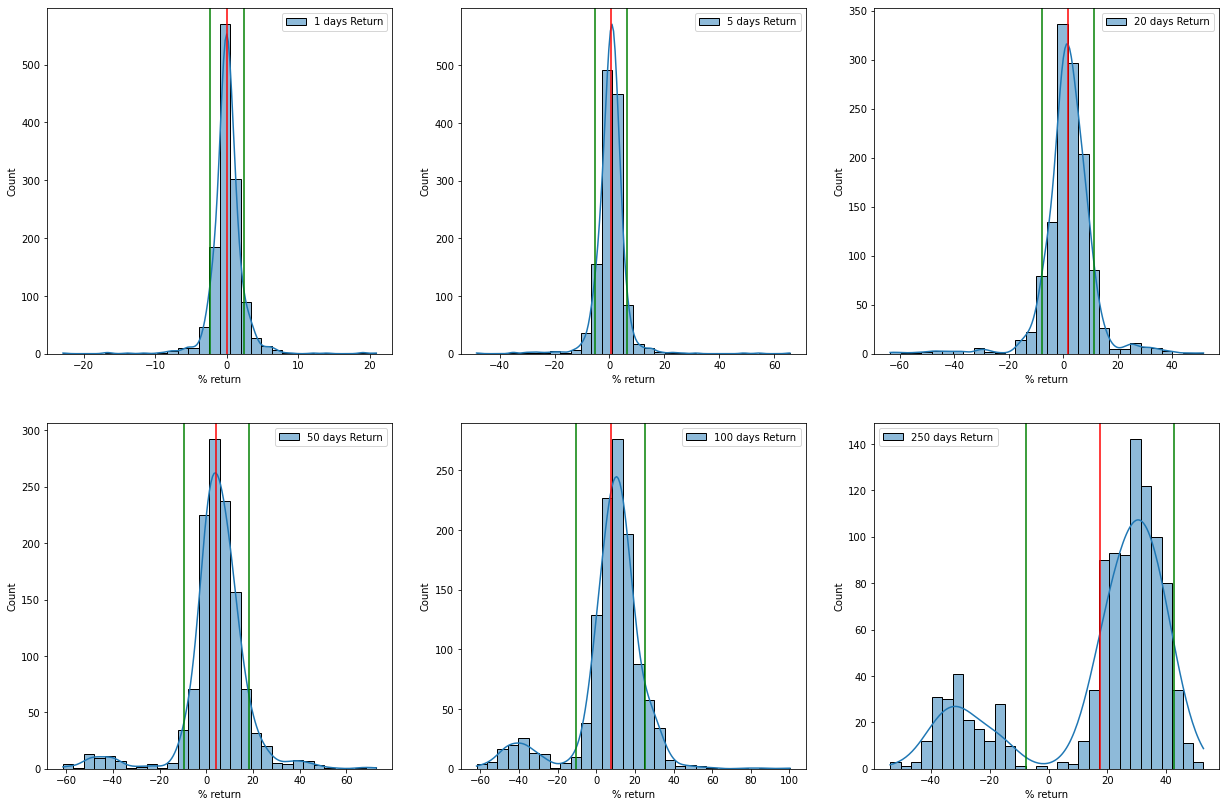

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

def stockreturn(prices,shift=1):
    stock_returns = (prices / prices.shift(shift)) - 1
    stock_returns =  stock_returns
    stock_returns.columns = [f'{shift} days Return']
    return stock_returns*100


ticker = "SAF.PA"
period = "5y"

ohlc = yf.download(ticker, period=period)
prices = ohlc["Adj Close"].to_frame()

fig, axs = plt.subplots(2, 3, figsize=(3*7, 2*7))
for ax, shift in zip(axs.flat, [1, 5, 20, 50, 100, 250]):
    try:
        x = stockreturn(prices, shift=shift)
        sns.histplot(x, kde=True, ax = ax, bins=30) #binwidth=10)
        ax.axvline(np.nanmean(x.values), color="red")
        ax.set_xlabel("% return")
        ax.axvline(np.nanmean(x.values) - np.nanstd(x.values), color="green")
        ax.axvline(np.nanmean(x.values) + np.nanstd(x.values), color="green")
    except ValueError:
        pass
plt.show()
prices["SMA_10"] = prices["Adj Close"].rolling(window=10).mean()
prices["SMA_20"] = prices["Adj Close"].rolling(window=20).mean()
prices["SMA_50"] = prices["Adj Close"].rolling(window=50).mean()
prices["SMA_100"] = prices["Adj Close"].rolling(window=100).mean()
prices["SMA_250"] = prices["Adj Close"].rolling(window=250).mean()
prices['EMA_50'] = prices["Adj Close"].ewm(span=50,adjust=False).mean()



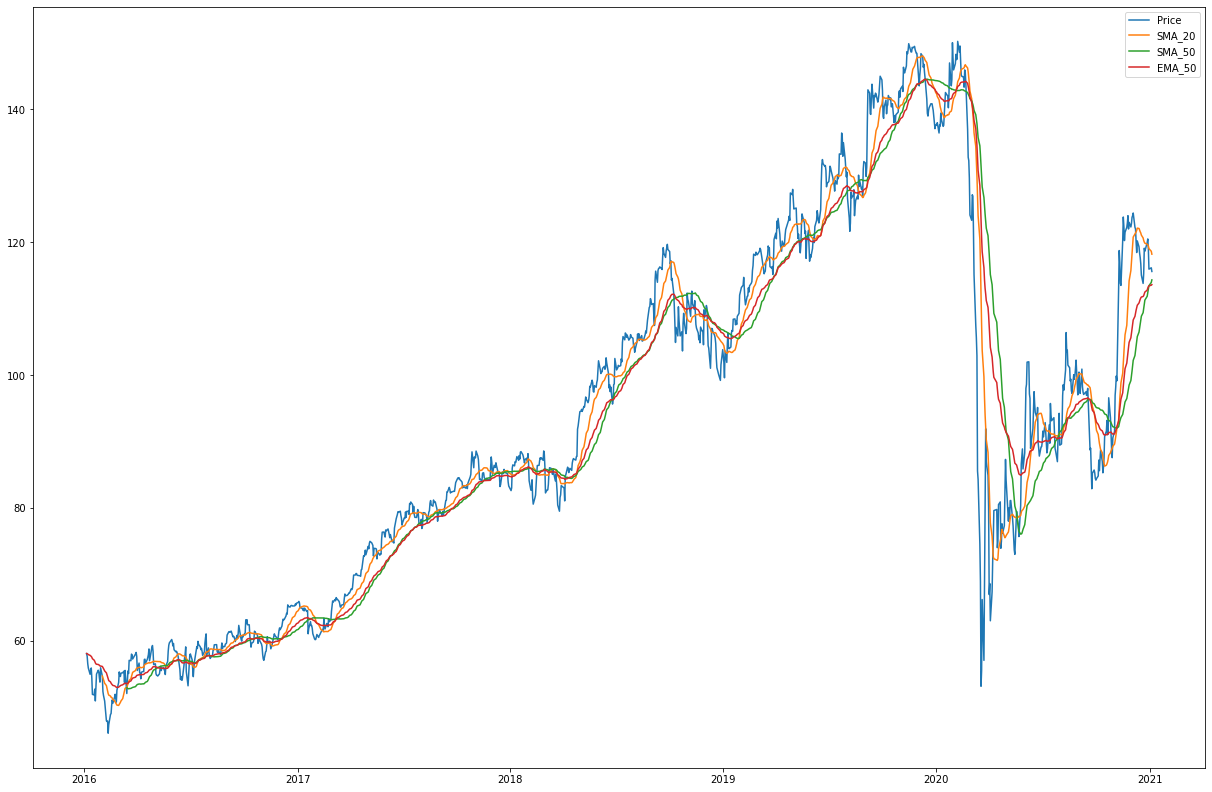

In [99]:
plt.figure(figsize=(3*7, 2*7))
plt.plot(prices.index, prices["Adj Close"], label="Price")
#plt.plot(prices.index, prices["SMA_10"], label="SMA_10")
plt.plot(prices.index, prices["SMA_20"], label="SMA_20")
plt.plot(prices.index, prices["SMA_50"], label="SMA_50")
plt.plot(prices.index, prices["EMA_50"], label="EMA_50")
#plt.plot(prices.index, prices["SMA_100"], label="SMA_100")
#plt.plot(prices.index, prices["SMA_250"])
plt.legend()
plt.show()

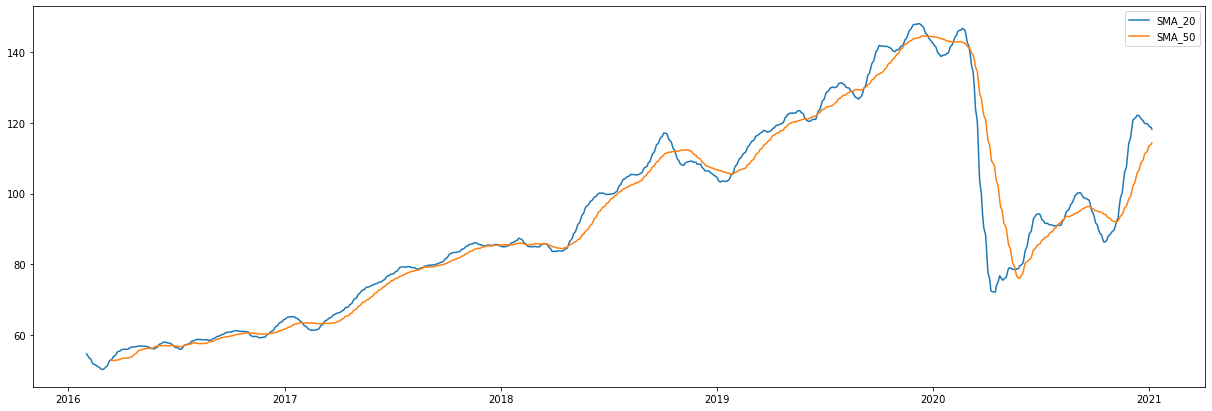

In [105]:
plt.figure(figsize=(3*7, 7))
#plt.plot(prices.index, prices["SMA_10"])
plt.plot(prices.index, prices["SMA_20"], label="SMA_20")
plt.plot(prices.index, prices["SMA_50"], label="SMA_50")
#plt.plot(prices.index, prices["SMA_100"])
#plt.plot(prices.index, prices["SMA_250"])
plt.legend()
plt.show()